## Observations and Insights 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [108]:
# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"

In [109]:
study_results_path = "data/Study_results.csv"

In [110]:
# Read the mouse data and the study results
mouse_metadata_path_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_path_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [111]:
study_results_df = pd.read_csv(study_results_path)
study_results_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [112]:
# Checking the number of mice.
mouse_metadata_path_df[mouse_metadata_path_df.columns[0]].nunique()

249

In [113]:
# Combine the data into a single dataset
merge_df=mouse_metadata_path_df.merge(study_results_df, left_on='Mouse ID', right_on='Mouse ID')


In [114]:
# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [115]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_df = merge_df[['Mouse ID','Timepoint']].copy().duplicated()
dup_mouse_df.sum()


5

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_df.columns = ['Mouse ID', 'Timepoint']
# dup_mouse_df.duplicated(['Mouse ID'])
dup_mouse_df


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_df.drop_duplicates(['Mouse ID'])
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [118]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df.duplicated(['Mouse ID']).sum()

0

## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# Using the aggregation method, produce the same summary statistics in a single line
mean = summary_df['Mean'].mean()
median = summary_df['Median'].mean()
variance = summary_df["Variance"].mean()
standard_deviation = summary_df['Standard Deviation'].mean()
sem = summary_df['SEM'].mean()

aggregate_df = pd.DataFrame({"Mean": [mean], "Median": [median], "Variance": [variance], "Standard Deviation": [standard_deviation], "SEM": [sem]})
aggregate_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.976144,49.94296,47.708346,6.809671,0.499641


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

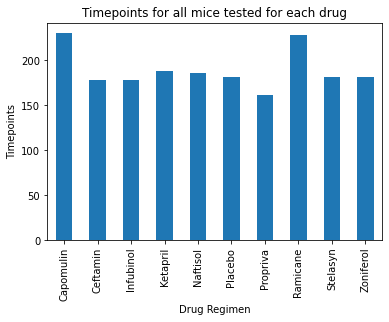

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_data = merge_df.groupby(['Drug Regimen']).count()["Timepoint"]
plot_data.plot.bar()
plt.title("Timepoints for all mice tested for each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plot_data

Text(0, 0.5, 'Timepoints')

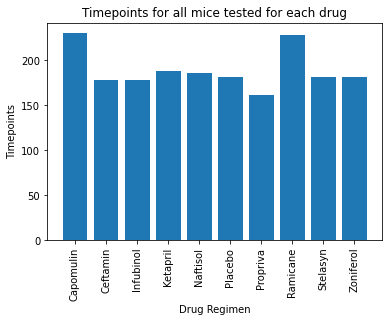

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_data = plot_data.tolist()
x_data = merge_df['Drug Regimen'].unique().tolist()
x_data.sort()

plt.xticks(rotation=90)
plt.bar(x_data, y_data)
plt.title("Timepoints for all mice tested for each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

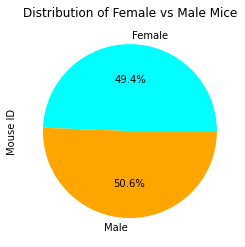

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
f_vs_m_df = merge_df.groupby(["Sex"]).count()["Mouse ID"]
f_vs_m_df.plot.pie(autopct="%1.1f%%",colors=["cyan","orange"])
plt.title("Distribution of Female vs Male Mice")
f_vs_m_df


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

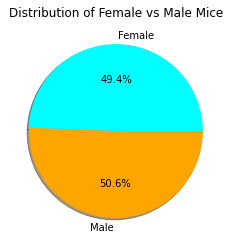

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
values = f_vs_m_df.tolist()

#plt.pie(values,explore=(0,0),labels,["blue","orange"],autopct="%1.1f%%",shadow=false,startangle=1)
plt.pie(values, explode=(0,0), labels=labels, colors=["cyan","orange"], autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Distribution of Female vs Male Mice")


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = merge_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [127]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(greatest_timepoint, merge_df, on=(["Mouse ID","Timepoint"]))
tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_dataset = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes    
for drug in drug_list:
    drug_used = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"] == drug]
    tumor_vol = drug_used["Tumor Volume (mm3)"]
    #print("tumor_vol: {0}".format(tumor_vol))
    # add subset
    tumor_vol_dataset.append(tumor_vol)
    
    
# Determine outliers using upper and lower bounds
quartile0 = tumor_vol_dataset[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_dataset[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_dataset[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_dataset[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
#print(f"For {drug_list[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
#print(f"For {drug_list[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
#print(f"For {drug_list[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
#print(f"For {drug_list[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

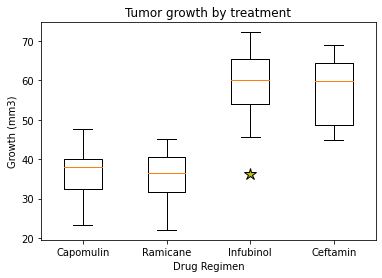

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_dataset, flierprops = flierprops, labels = drug_list)
plt.show()

## Line and Scatter Plots

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find list of mice that were treated with capomulin, then we can use one of these mice
capomulin_mice = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [131]:
# Chose mouse b128 as subject
mouse_df = merge_df.loc[merge_df["Mouse ID"] == "b128"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


Text(0, 0.5, ' Tumor volume (mm3)')

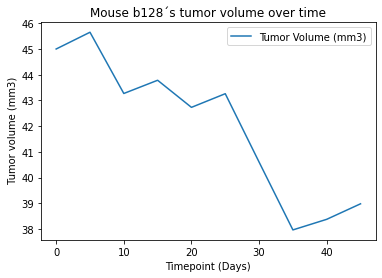

In [132]:
# Use pandas line plot to generate graph
mouse_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)")
plt.title( "Mouse b128´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")


Text(0, 0.5, 'Tumor volume (mm3)')

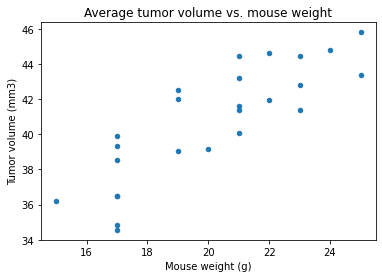

In [133]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_df = capomulin_mice.groupby(["Mouse ID"]).mean()
capomulin_avg_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


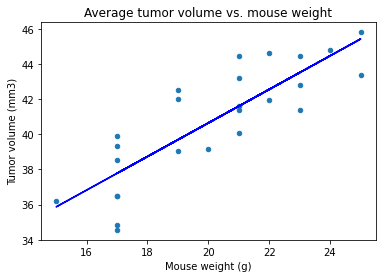

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_tumor_vol = capomulin_avg_df["Weight (g)"]
avg_weight = capomulin_avg_df["Tumor Volume (mm3)"]

# Compute correlation and regression
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

capomulin_avg_df = capomulin_mice.groupby(["Mouse ID"]).mean()
capomulin_avg_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

plt.plot(avg_tumor_vol,regress_values,"b-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
